In [1]:
setwd('/Users/gimdong-wan/Desktop/김동완 수업자료/응용통계학/기말/FinalProject')

In [88]:
library(gridExtra)
library(GGally)
library(ggpubr)
library(tidymodels)
library(tidyverse)
library(skimr)
library(knitr)
library(corrplot) 
library(fmsb)

오바마의 투표율 (이항)

In [89]:
mn08 <- read_csv('data/mn08.csv')
mn04 <- read_csv('data/mn04.csv')
mn08_income <- read_csv('data/mn08_income.csv')


─ Column specification ────────────────────────────
cols(
  County = col_character(),
  Obama = col_double(),
  McCain = col_double(),
  pct_Obama = col_double(),
  pct_rural = col_double(),
  medHHinc = col_double(),
  unemp_rate = col_double(),
  pct_poverty = col_double(),
  medAge2007 = col_double(),
  medAge2000 = col_double(),
  Gini_Index = col_double(),
  pct_native = col_double()
)



─ Column specification ────────────────────────────
cols(
  County = col_character(),
  pct_Kerry = col_double(),
  Kerry = col_double(),
  Bush = col_double(),
  Num_vote_04 = col_double()
)



─ Column specification ────────────────────────────
cols(
  Rank = col_double(),
  County = col_character(),
  Per_capital_income = col_double(),
  Median_household_income = col_double(),
  Median_family_income = col_double(),
  Population = col_double(),
  Number_of_household = col_double()
)




In [90]:
mn08 <- merge(mn08,mn08_income,'County')
mn08 <- merge(mn08, mn04, 'County')

In [91]:
colSums(is.na(mn08))

County                   Obama                  McCain 
                      0                       0                       0 
              pct_Obama               pct_rural                medHHinc 
                      0                       0                       0 
             unemp_rate             pct_poverty              medAge2007 
                      0                       0                      40 
             medAge2000              Gini_Index              pct_native 
                      0                      40                      40 
                   Rank      Per_capital_income Median_household_income 
                      0                       0                       0 
   Median_family_income              Population     Number_of_household 
                      0                       0                       0 
              pct_Kerry                   Kerry                    Bush 
                      0                       0                       0 
            Num_vote_04 
                      0

In [92]:
mn08 <- mn08%>%mutate(Num_vote_08 = Obama+McCain,
                      InFavor_04 = (pct_Kerry > 50),InFavor_08 = (pct_Obama >50),)

In [93]:
colnames(mn08)

[1] "County"                  "Obama"                  
 [3] "McCain"                  "pct_Obama"              
 [5] "pct_rural"               "medHHinc"               
 [7] "unemp_rate"              "pct_poverty"            
 [9] "medAge2007"              "medAge2000"             
[11] "Gini_Index"              "pct_native"             
[13] "Rank"                    "Per_capital_income"     
[15] "Median_household_income" "Median_family_income"   
[17] "Population"              "Number_of_household"    
[19] "pct_Kerry"               "Kerry"                  
[21] "Bush"                    "Num_vote_04"            
[23] "Num_vote_08"             "InFavor_04"             
[25] "InFavor_08"

In [94]:
cor(mn08[,c(4,6,14:16)])
cor(mn08[,c(4,17,18,22,23)])

,pct_Obama,medHHinc,Per_capital_income,Median_household_income,Median_family_income
pct_Obama,1.00000000,-0.07688084,0.02449183,-0.1525612,-0.02631147
medHHinc,-0.07688084,1.00000000,0.64606122,0.8163740,0.78545204
Per_capital_income,0.02449183,0.64606122,1.00000000,0.8352436,0.86298420
Median_household_income,-0.15256115,0.81637395,0.83524361,1.0000000,0.95224404
Median_family_income,-0.02631147,0.78545204,0.86298420,0.9522440,1.00000000


,pct_Obama,Population,Number_of_household,Num_vote_04,Num_vote_08
pct_Obama,1.0000000,0.3013284,0.3095593,0.3098571,0.3041878
Population,0.3013284,1.0000000,0.9989835,0.9992879,0.9995683
Number_of_household,0.3095593,0.9989835,1.0000000,0.9996644,0.9994150
Num_vote_04,0.3098571,0.9992879,0.9996644,1.0000000,0.9998720
Num_vote_08,0.3041878,0.9995683,0.9994150,0.9998720,1.0000000


In [95]:
mn08 <- mn08[,c(1,2,4,5,7,8,10:15,17,18,19,23,24,25)]

In [96]:
new_data <- data.frame(County = mn08$County, rural = mn08$pct_rural*mn08$Population,
                       unemp = mn08$unemp_rate*mn08$Population, poverty = mn08$pct_poverty*mn08$Population, 
                       income = mn08$Per_capital_income * mn08$Population,
                       Num = mn08$Population, pct_Obama = mn08$pct_Obama, InFavor = mn08$InFavor_08, pct_Kerry = mn08$pct_Kerry)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



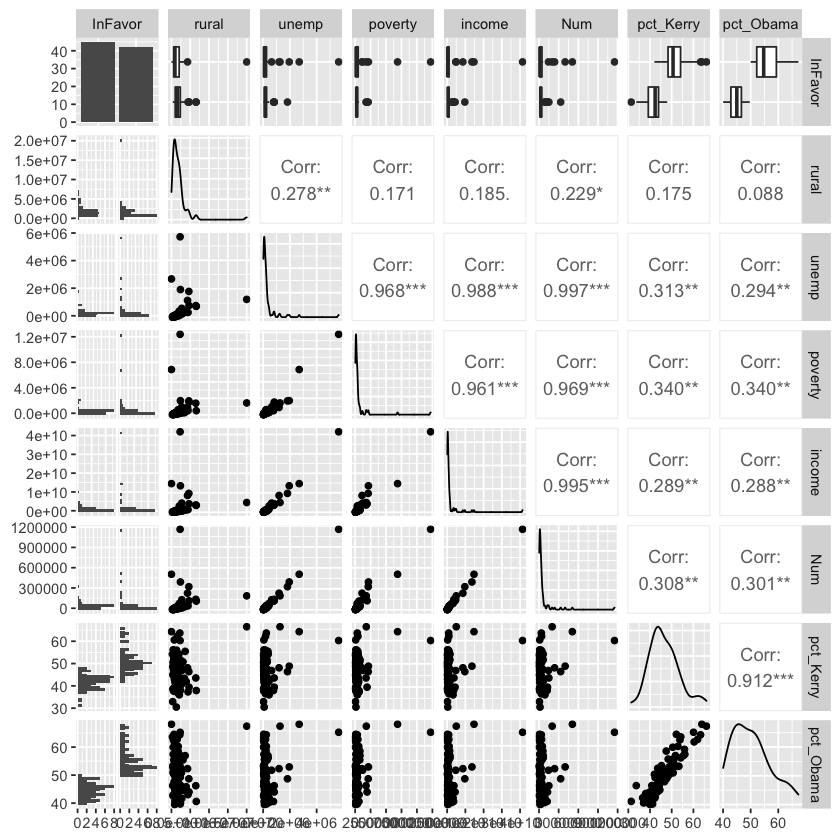

In [97]:
gg<- ggpairs(data = new_data , columns = c('InFavor', 'rural', 'unemp','poverty','income','Num','pct_Kerry','pct_Obama'))

gg[2,1] <- gg[2,1] + geom_histogram(binwidth = 100000)
gg[3,1] <- gg[3,1] + geom_histogram(binwidth = 100000)
gg[4,1] <- gg[4,1] + geom_histogram(binwidth = 100000)
gg[5,1] <- gg[5,1] + geom_histogram(binwidth = 100000000)
gg[6,1] <- gg[6,1] + geom_histogram(binwidth = 10000)
gg[7,1] <- gg[7,1] + geom_histogram(binwidth = 1)
gg[8,1] <- gg[8,1] + geom_histogram(binwidth = 1)
gg

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



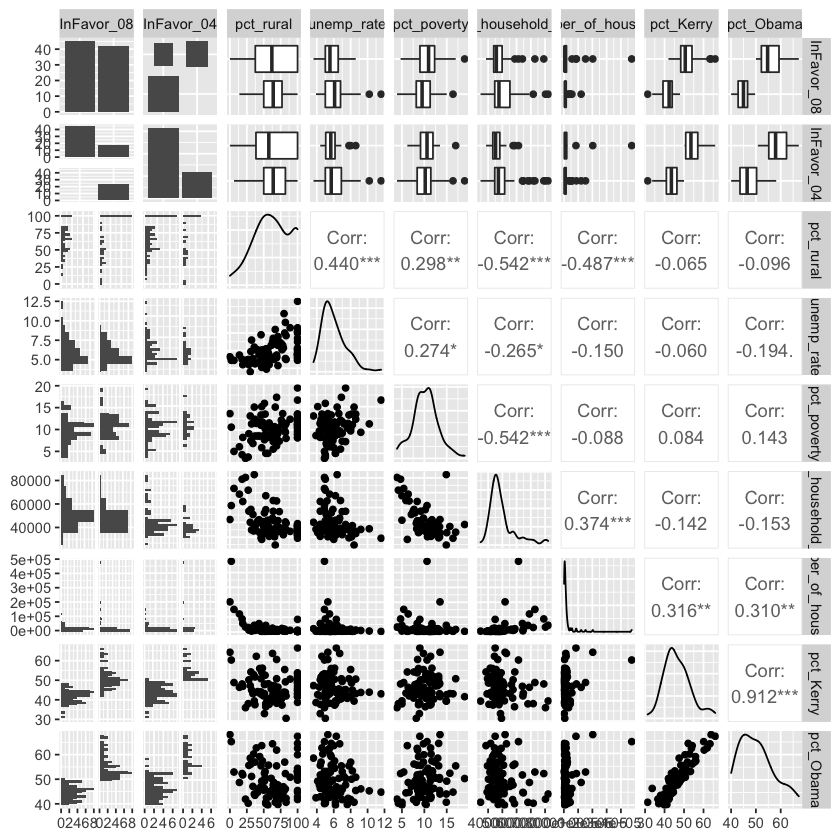

In [98]:
gg<- ggpairs(data = mn08 , columns = c('InFavor_08','InFavor_04', 'pct_rural', 'unemp_rate', 'pct_poverty','Median_household_income','Number_of_household','pct_Kerry','pct_Obama'))

gg[3,1] <- gg[3,1] + geom_histogram(binwidth = 1)
gg[4,1] <- gg[4,1] + geom_histogram(binwidth = 1)
gg[5,1] <- gg[5,1] + geom_histogram(binwidth = 1)
gg[6,1] <- gg[6,1] + geom_histogram(binwidth = 10000)
gg[7,1] <- gg[7,1] + geom_histogram(binwidth = 10000)
gg[8,1] <- gg[8,1] + geom_histogram(binwidth = 1)
gg[9,1] <- gg[9,1] + geom_histogram(binwidth  = 1)
gg

사용할 변수
- pct_kerry, poverty, pct_rural, unemp_rate

In [99]:
final_data <- data.frame(County = mn08$County,Obama = mn08$Obama, Num = mn08$Num_vote_08, pct_rural = mn08$pct_rural,
                       unemp_rate = mn08$unemp_rate, poverty = mn08$pct_poverty*mn08$Population/1000, 
                       pct_Kerry = mn08$pct_Kerry, pct_Obama = mn08$pct_Obama,InFavor = mn08$InFavor_08 )

In [100]:
summary(final_data)

    County              Obama             Num           pct_rural     
 Length:87          Min.   :   971   Min.   :  1974   Min.   :  0.00  
 Class :character   1st Qu.:  2849   1st Qu.:  5703   1st Qu.: 46.00  
 Mode  :character   Median :  5646   Median : 11581   Median : 64.00  
                    Mean   : 18084   Mean   : 32744   Mean   : 63.46  
                    3rd Qu.: 11812   3rd Qu.: 21611   3rd Qu.: 83.00  
                    Max.   :420958   Max.   :652015   Max.   :100.00  
   unemp_rate        poverty           pct_Kerry       pct_Obama    
 Min.   : 3.600   Min.   :   33.56   Min.   :31.32   Min.   :40.03  
 1st Qu.: 5.000   1st Qu.:  120.46   1st Qu.:42.20   1st Qu.:44.96  
 Median : 5.700   Median :  225.27   Median :45.28   Median :49.30  
 Mean   : 6.007   Mean   :  583.64   Mean   :46.54   Mean   :50.19  
 3rd Qu.: 6.750   3rd Qu.:  388.05   3rd Qu.:50.53   3rd Qu.:53.76  
 Max.   :11.600   Max.   :12215.70   Max.   :66.03   Max.   :67.29  
  InFavor       
 Mo

In [101]:
head(final_data)

,County,Obama,Num,pct_rural,unemp_rate,poverty,pct_Kerry,pct_Obama,InFavor
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Aitkin,4595,9184,100,8.1,217.1068,48.76974,50.03267,TRUE
2,Anoka,86977,178334,14,5.5,2117.4016,46.62161,48.77197,FALSE
3,Becker,7687,16538,76,6.8,393.2984,40.81929,46.48083,FALSE
4,Beltrami,12019,21781,69,6.9,755.5140,50.85218,55.18112,TRUE
5,Benton,8452,18790,41,6.1,334.5237,44.51994,44.98137,FALSE
6,Big Stone,1552,2914,100,5.5,62.1742,50.87777,53.26012,TRUE


plot(pct_Obama~pct_rural,data = final_data)
plot(pct_Obama~unemp_rate,data = final_data)
plot(pct_Obama~poverty,data = final_data)
plot(pct_Obama~pct_Kerry,data = final_data)

In [102]:
colnames(final_data)

[1] "County"     "Obama"      "Num"        "pct_rural"  "unemp_rate"
[6] "poverty"    "pct_Kerry"  "pct_Obama"  "InFavor"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



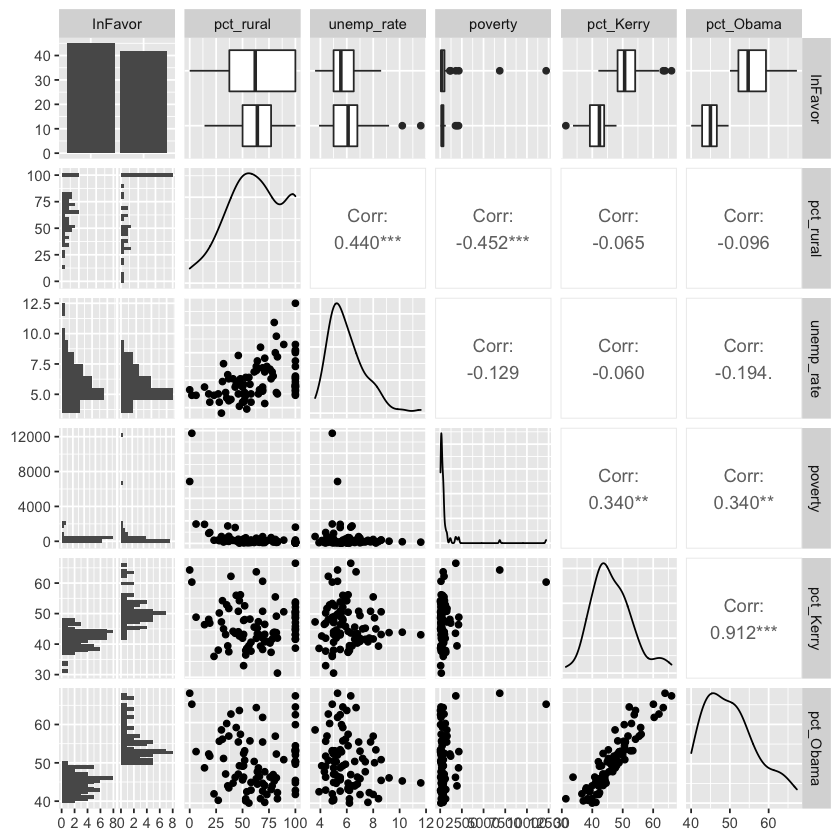

In [103]:
gg<- ggpairs(data = final_data , columns = c('InFavor', 'pct_rural','unemp_rate', 'poverty','pct_Kerry','pct_Obama'))

gg[2,1] <- gg[2,1] + geom_histogram(binwidth = 1)
gg[3,1] <- gg[3,1] + geom_histogram(binwidth = 1)
gg[4,1] <- gg[4,1] + geom_histogram(binwidth = 1)
gg[5,1] <- gg[5,1] + geom_histogram(binwidth = 1)
gg[6,1] <- gg[6,1] + geom_histogram(binwidth = 1)

gg

### 선형성 가정 평가 
    - 경험적 로짓 도표
    - 각 지역별로 성공/실패를 계산해서 경험적 로짓을 구함

In [104]:
colnames(final_data)

[1] "County"     "Obama"      "Num"        "pct_rural"  "unemp_rate"
[6] "poverty"    "pct_Kerry"  "pct_Obama"  "InFavor"

In [105]:
final_data <- final_data%>%mutate(phat = pct_Obama/100,
                                  elogit = log(phat/(1-phat)),
                                  Hennepin = ifelse(final_data$County == 'Hennepin', 'Hennepin', NA))

In [106]:
final_data%>%head(5)

,County,Obama,Num,pct_rural,unemp_rate,poverty,pct_Kerry,pct_Obama,InFavor,phat,elogit,Hennepin
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>
1,Aitkin,4595,9184,100,8.1,217.1068,48.76974,50.03267,TRUE,0.5003267,0.001306621,NA
2,Anoka,86977,178334,14,5.5,2117.4016,46.62161,48.77197,FALSE,0.4877197,-0.049131192,NA
3,Becker,7687,16538,76,6.8,393.2984,40.81929,46.48083,FALSE,0.4648083,-0.140999857,NA
4,Beltrami,12019,21781,69,6.9,755.5140,50.85218,55.18112,TRUE,0.5518112,0.207991433,NA
5,Benton,8452,18790,41,6.1,334.5237,44.51994,44.98137,FALSE,0.4498137,-0.201423327,NA


In [107]:
VIF(lm(pct_Obama ~ poverty+pct_Kerry+unemp_rate+pct_rural,data=final_data))


#VIF(lm(texture_mean ~ .,data=X))

[1] 6.771404

Warning message:
“Ignoring unknown parameters: shpae”
Warning message:
“Ignoring unknown parameters: shpae”
Warning message:
“Ignoring unknown parameters: shpae”
Warning message:
“Ignoring unknown parameters: shpae”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 86 rows containing missing values (geom_text).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 86 rows containing missing values (geom_text).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 86 rows containing missing values (geom_text).”


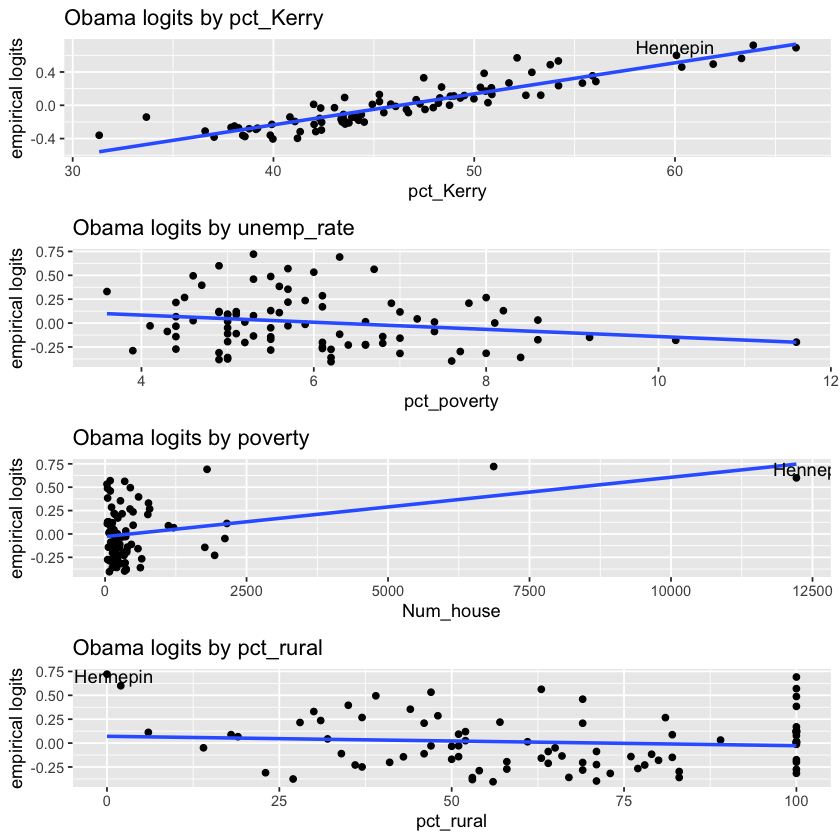

In [108]:
logkerry <- ggplot(final_data, aes(x = pct_Kerry, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = lm,
                se = FALSE)+
    labs(x = "pct_Kerry",
        y = "empirical logits",
        title = "Obama logits by pct_Kerry")+
     geom_text(aes(label=Hennepin), x = 60, y = .7)


logunemp <- ggplot(final_data, aes(x = unemp_rate, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = lm,
                se = FALSE)+
    labs(x = "pct_poverty",
        y = "empirical logits",
        title = "Obama logits by unemp_rate")

logpoverty <- ggplot(final_data, aes(x = poverty, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = lm,
                se = FALSE)+
    labs(x = "Num_house",
        y = "empirical logits",
        title = "Obama logits by poverty")+
    geom_text(aes(label=Hennepin), x = 12500, y = .7)

logrural <- ggplot(final_data, aes(x = pct_rural, y = elogit))+
    geom_point(shpae = 1) +
    geom_smooth (method = lm,
                se = FALSE)+
    labs(x = "pct_rural",
        y = "empirical logits",
        title = "Obama logits by pct_rural")+
    geom_text(aes(label=Hennepin), x = 1, y = .7)


grid.arrange(logkerry, logunemp,logpoverty,logrural, ncol = 1)

In [109]:
final_data[final_data$County == 'Hennepin',]

,County,Obama,Num,pct_rural,unemp_rate,poverty,pct_Kerry,pct_Obama,InFavor,phat,elogit,Hennepin
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<chr>
27,Hennepin,420958,652015,2,4.9,12215.7,60.07146,64.56263,TRUE,0.6456263,0.5998686,Hennepin


In [110]:
with(final_data,cor(pct_poverty, pct_Kerry))

ERROR: Error in is.data.frame(x): 객체 'pct_poverty'를 찾을 수 없습니다


In [ ]:
model.Kerry <- glm(Obama/Num ~ pct_Kerry, weights = Num,
                  family = binomial, data = final_data)
summary(model.Kerry)
exp(coef(model.Kerry))

$$log(\frac{\hat{p}_i}{1-\hat{p_i}})=-1.892+0.041(pctkerry)$$

- ${\hat{p}_i}$ : i 지역에서의 오바마 득표율의 추정치
- <code>pct_Kerry</code>에 대한 추정 오즈비, 즉 캐리 득표율에 대한 지수 계수는 $e^{0.041} = 1.042$
    - 작년 캐리의 득표율(%)가 1%올라갈 때 마다 찬성 특표율은 4.2%증가

In [ ]:
model.KerryPoverty <- glm(Obama/Num ~ pct_Kerry + Num_house+pct_poverty+pct_Kerry:Num_house, weights = Num,
                  family = binomial, data = final_data)
summary(model.KerryPoverty)
exp(coef(model.KerryPoverty))

In [ ]:
model.KerryPoverty <- glm(Obama/Num ~ pct_Kerry + log(Num_house)+pct_poverty+pct_Kerry:log(Num_house), weights = Num,
                  family = binomial, data = final_data)
summary(model.KerryPoverty)
exp(coef(model.KerryPoverty))

In [ ]:
녀

- ${\hat{p}_i}$ : i 지역에서의 오바마 득표율의 추정치
- <code>pct_Kerry</code>에 대한 추정 오즈비, 즉 캐리 득표율에 대한 지수 계수는 $e^{0.041} = 1.038$
    - 작년 캐리의 득표율(%)가 1%올라갈 때 마다 오바마의 득표율은 3.8%증가
- <code>poverty</code> 에 대한 추정 오즈비 , 즉 카운티 별 저소득층 인구에 대한 지수 계수는 $e^{0.00089}$ = 1.0009
    - 저소득층 인구가 1000명 증가할 수록 오바마의 특표율은 0.09% 증가

In [ ]:
anova(model.Kerry,model.KerryPoverty, test = "Chisq")

In [ ]:
exp(confint(model.KerryPoverty))

In [ ]:
1-pchisq(3147.571,84)

In [120]:
model.KerryXPoverty <- glm(Obama/Num ~ pct_Kerry + poverty+ pct_Kerry:poverty
                           +unemp_rate+pct_rural+pct_rural:poverty+unemp_rate:pct_rural, weights = Num,
                  family = binomial, data = final_data)
summary(model.KerryXPoverty)
exp(coef(model.KerryXPoverty))


Call:
glm(formula = Obama/Num ~ pct_Kerry + poverty + pct_Kerry:poverty + 
    unemp_rate + pct_rural + pct_rural:poverty + unemp_rate:pct_rural, 
    family = binomial, data = final_data, weights = Num)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11.7064   -3.2502   -0.4206    2.8764   15.9758  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.270e+00  2.830e-02 -44.868  < 2e-16 ***
pct_Kerry             3.604e-02  3.079e-04 117.057  < 2e-16 ***
poverty              -6.129e-03  8.726e-04  -7.023 2.17e-12 ***
unemp_rate           -7.459e-02  4.005e-03 -18.627  < 2e-16 ***
pct_rural            -2.750e-03  3.340e-04  -8.234  < 2e-16 ***
pct_Kerry:poverty     1.123e-04  1.442e-05   7.785 6.95e-15 ***
poverty:pct_rural    -9.174e-06  5.509e-06  -1.665   0.0959 .  
unemp_rate:pct_rural  5.343e-04  5.610e-05   9.523  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion 

(Intercept)            pct_Kerry              poverty 
           0.2808588            1.0366947            0.9938902 
          unemp_rate            pct_rural    pct_Kerry:poverty 
           0.9281223            0.9972537            1.0001123 
   poverty:pct_rural unemp_rate:pct_rural 
           0.9999908            1.0005345

In [39]:
anova(model.KerryPoverty,model.KerryXPoverty, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,84,3147.571,NA,NA,NA
2,83,3109.952,1,37.61943,8.598376e-10


In [1]:
1-pchisq(3109.952,83)

[1] 0

- 오바마에게 득표할 오즈에 대한 저소득층 인구의 영향은 제안된 지난 민주당 지지비율에 따라 통계적으로 유의하게 다르다. (Wald Z = ? ; x^2 = 37.62, p<0.01)

문맥에 맞게 교호작용 회귀계수를 해석하기 위해,

In [128]:
model6 <- glm(Obama/Num ~ pct_Kerry + poverty+pct_Kerry:poverty, weights = Num,
                  family = binomial, data = final_data)
summary(model6)
exp(coef(model6))


Call:
glm(formula = Obama/Num ~ pct_Kerry + poverty + pct_Kerry:poverty, 
    family = binomial, data = final_data, weights = Num)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-12.2894   -3.6938   -0.4377    4.0219   25.2201  

Coefficients:
                    Estimate Std. Error  z value Pr(>|z|)    
(Intercept)       -1.704e+00  1.225e-02 -139.116  < 2e-16 ***
pct_Kerry          3.652e-02  2.465e-04  148.175  < 2e-16 ***
poverty           -3.207e-03  6.684e-04   -4.797 1.61e-06 ***
pct_Kerry:poverty  6.876e-05  1.121e-05    6.133 8.62e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 92830  on 86  degrees of freedom
Residual deviance:  3110  on 83  degrees of freedom
AIC: 3980.1

Number of Fisher Scoring iterations: 3


(Intercept)         pct_Kerry           poverty pct_Kerry:poverty 
        0.1818902         1.0371921         0.9967986         1.0000688

In [84]:
exp(-0.098)

[1] 0.9066489

In [137]:
final_model <- glm(Obama/Num_vote_08 ~ unemp_rate+pct_poverty+pct_Kerry, weights = Num_vote_08,
                  family = binomial, data = mn08)
summary(final_model)
exp(coef(final_model))


Call:
glm(formula = Obama/Num_vote_08 ~ unemp_rate + pct_poverty + 
    pct_Kerry, family = binomial, data = mn08, weights = Num_vote_08)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11.8207   -3.2325   -0.8528    4.2283   12.1452  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.5918880  0.0112905 -140.99   <2e-16 ***
unemp_rate  -0.0487962  0.0013147  -37.12   <2e-16 ***
pct_poverty  0.0106848  0.0004379   24.40   <2e-16 ***
pct_Kerry    0.0382013  0.0001559  245.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 92830.1  on 86  degrees of freedom
Residual deviance:  2140.8  on 83  degrees of freedom
AIC: 3011

Number of Fisher Scoring iterations: 3


(Intercept)  unemp_rate pct_poverty   pct_Kerry 
  0.2035410   0.9523752   1.0107421   1.0389403

In [129]:
exp(-1.46)

[1] 0.2322363

In [134]:
summary(mn08$pct_poverty)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.90    8.50   10.30   10.26   11.70   19.00 

- ${\hat{p}_i}$ : i 지역에서의 오바마 득표율의 추정치
- <code>pct_Kerry</code>에 대한 추정 오즈비, 즉 캐리 득표율에 대한 지수 계수는 $e^{0.036} = 1.037$
    - 작년 캐리의 득표율(%)가 1%올라갈 때 마다 오바마의 득표율은 3.7%증가
- <code>poverty</code> 에 대한 추정 오즈비 , 즉 카운티 별 저소득층 인구에 대한 지수 계수는 $e^{-0.0069}$ = 0.993
    - 저소득층 인구가 1000명 증가할 수록 오바마의 득표율은 0.097% 감소
- <code>unemp_rate</code>에 대한 추정 오즈비, 즉 카운티별 실업자율에 대한 지수 계수는 $e^{-0.037}$ = 0.964
    - 실업률이 1% 증가할 수록 오바마의 득표율은 0.36% 감소
- <code>poverty:pct_Kerry</code>에 대한 ㅊ줭 오즈비, 즉 

In [124]:
exp(confint(final_model))


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.2255830,0.2393841
unemp_rate,0.9613128,0.9663972
poverty,0.9918047,0.9944599
pct_Kerry,1.0361077,1.0371111
poverty:pct_Kerry,1.0001032,1.0001479


In [87]:
anova(model4,final_model, test = "Chisq")

ERROR: Error in anova(model4, final_model, test = "Chisq"): 객체 'model4'를 찾을 수 없습니다


In [86]:
final_model

ERROR: Error in eval(expr, envir, enclos): 객체 'final_model'를 찾을 수 없습니다


In [ ]:
rrHale.df <- rrHale.df %>%
  mutate(resid.BxD = residuals(model.HaleBxD), 
         fit.BxD = fitted.values(model.HaleBxD))
ggplot(rrHale.df, aes(x = fit.BxD, y = resid.BxD)) +
  geom_point() +
  geom_text(aes(label=Greensboro), nudge_x = -.075) +
  xlab("Fitted values from interaction model") +
  ylab("Deviance residuals from interaction model")

In [85]:
final_data <- final_data %>%
  mutate(resid.BxD = residuals(final_model), 
         fit.BxD = fitted.values(final_model))
ggplot(final_data, aes(x = fit.BxD, y = resid.BxD)) +
  geom_point() +
  geom_text(aes(label=Greensboro), nudge_x = -.075) +
  xlab("Fitted values from interaction model") +
  ylab("Deviance residuals from interaction model")

ERROR: Error: Problem with `mutate()` column `resid.BxD`.
[34mℹ[39m `resid.BxD = residuals(final_model)`.
[31m✖[39m 객체 'final_model'를 찾을 수 없습니다
